Celem ponizszego kodu jest wydobycie informacji na temat zakazen wirusem Covid-19 ze strony internetowej https://www.politykazdrowotna.com/56875,covid-19-raport-polska-305-nowych-zakazen i obliczenie podstawowych statystyk opisowych.

In [56]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import statistics as st
import matplotlib.pyplot as plt
import collections

#driver = webdriver.Edge(executable_path=r'C:\webdriver\msedgedriver.exe')
driver = webdriver.Safari()
driver.get("https://www.politykazdrowotna.com/56875,covid-19-raport-polska-305-nowych-zakazen")

content = driver.page_source

soup = BeautifulSoup(content, 'html.parser')

# April
kwiecien = re.findall('(?s)(?=10 kwietnia).*?(?=1 maja)', str(soup))
# May
maj = re.findall('(?s)(?=1 maja).*?(?=24 maja)', str(soup))

#Wyciągnięcie tylko wieku i płci osobno dla kwietnia i maja
#Age and sex separately
lista_kwiecien = re.findall('((\d+\d+)-(\w+))', str(kwiecien))
lista_maj = re.findall('((\d+\d+)-(\w+))', str(maj))

#Zmienne pomocnicze
#Auxilliary variables
lm = [] #Łączna liczba mężczyzn
lk = [] #Łączna liczba kobiet

#Liczba kobiet kwiecień
lkk = [] #Number of women (April)
#Liczba kobiet maj
lkm = [] #Number of women(May)
#Liczba mezczyzn kwiecien
lmk = [] #Number of man (April)
#Liczba mezczyzn maj
lmm = [] #Number of man (May)

#Maj (May)
for krotki in lista_maj:
    lm.append(krotki[0])
    
for krotki in lista_kwiecien:
    lk.append(krotki[0])

kobiety_kwiecien = re.findall('(\d\d)-([K])', str(lk))
kobiety_maj = re.findall('(\d\d)-([K])', str(lm))

for krotki in kobiety_kwiecien:
    lkk.append(krotki[0])
    
for krotki in kobiety_maj:
    lkm.append(krotki[0])

chlopaki_kwiecien = re.findall('(\d\d)-([M])', str(lk))
chlopaki_maj = re.findall('(\d\d)-([M])', str(lm))

for krotki in chlopaki_kwiecien:
    lmk.append(krotki[0])
    
for krotki in chlopaki_maj:
    lmm.append(krotki[0])

#Łącznie kobiety
#Women (total)
kobiety = lkk + lkm
#Łącznie mężczyźni
#Men (total)
mezczyzni = lmk + lmm

#Konwersja na typ calkowity
#Conversion to integer type
kobiety = [int(i) for i in kobiety]
mezczyzni = [int(i) for i in mezczyzni]

print("-------KOBIETY-------")

print("Srednia (kobiety) : " + str(round(st.mean(kobiety), 2)))
print("Mediana (kobiety) : " + str(st.median(kobiety)))
print("Odchylenie standardowe (kobiety) : " + str(round(st.stdev(kobiety), 2)))

print("-------MEZCZYZNI-------")
print("Srednia (mezczyzni) : " + str(round(st.mean(mezczyzni), 2)))
print("Mediana (mezczyzni) : " + str(st.median(mezczyzni)))
print("Odchylenie standardowe (mezczyzni) : " + str(round(st.stdev(mezczyzni), 2)))

print("-------ŁĄCZNIE-------")
print("Srednia (łącznie) : " + str(round(st.mean(mezczyzni + kobiety), 2)))
print("Mediana (łącznie) : " + str(st.median(mezczyzni + kobiety)))
print("Odchylenie standardowe (łącznie) : " + str(round(st.stdev(mezczyzni + kobiety), 2)))

-------KOBIETY-------
Srednia (kobiety) : 78.95
Mediana (kobiety) : 82
Odchylenie standardowe (kobiety) : 12.25
-------MEZCZYZNI-------
Srednia (mezczyzni) : 73.37
Mediana (mezczyzni) : 74.0
Odchylenie standardowe (mezczyzni) : 11.97
-------ŁĄCZNIE-------
Srednia (łącznie) : 76.19
Mediana (łącznie) : 78
Odchylenie standardowe (łącznie) : 12.42


Text(0.0, 0.8, 'Łącznie')

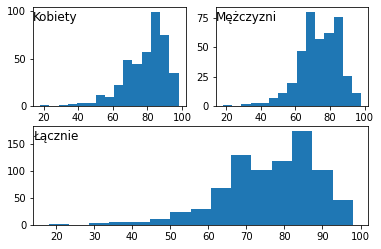

In [84]:
plt.subplot(2, 2, 1)
plt.hist(kobiety, bins = 15)
plt.title("Kobiety", loc="left", y = 0.8)

plt.subplot(2, 2, 2)
plt.hist(mezczyzni, bins = 15)
plt.title("Mężczyzni", loc="left", y = 0.8)

plt.subplot(2, 1, 2)
plt.hist(mezczyzni + kobiety, bins = 15)
plt.title(label = "Łącznie", loc="left", y = 0.8)

In [90]:
lkk = [int(i) for i in lkk]
lkm = [int(i) for i in lkm]
lmk = [int(i) for i in lmk]
lmm = [int(i) for i in lkk]

print("-------KOBIETY KWIECIEŃ-------")

print("Srednia (kobiety, kwiecień) : " + str(round(st.mean(lkk), 2)))
print("Mediana (kobiety, kwiecień) : " + str(st.median(lkk)))
print("Odchylenie standardowe (kobiety, kwiecień) : " + str(round(st.stdev(lkk), 2)))

print("-------KOBIETY MAJ-------")

print("Srednia (kobiety, maj) : " + str(round(st.mean(lkm), 2)))
print("Mediana (kobiety, maj) : " + str(st.median(lkm)))
print("Odchylenie standardowe (kobiety, maj) : " + str(round(st.stdev(lkm), 2)))

print("\n-------MEZCZYZNI KWIECIEŃ-------")
print("Srednia (mezczyzni, kwiecień) : " + str(round(st.mean(lmk), 2)))
print("Mediana (mezczyzni, kwiecień) : " + str(st.median(lmk)))
print("Odchylenie standardowe (mezczyzni, kwiecień) : " + str(round(st.stdev(lmk), 2)))

print("-------MEZCZYZNI MAJ-------")
print("Srednia (mezczyzni, maj) : " + str(round(st.mean(lmm), 2)))
print("Mediana (mezczyzni, maj) : " + str(st.median(lmm)))
print("Odchylenie standardowe (mezczyzni, maj) : " + str(round(st.stdev(lmm), 2)))

print("\n-------ŁĄCZNIE KWIECIEŃ-------")
print("Srednia (łącznie, kwiecień) : " + str(round(st.mean(lkk + lmk), 2)))
print("Mediana (łącznie, kwiecień) : " + str(st.median(lkk + lmk)))
print("Odchylenie standardowe (łącznie, kwiecień) : " + str(round(st.stdev(lkk + lmk), 2)))

print("-------ŁĄCZNIE MAJ-------")
print("Srednia (łącznie, maj) : " + str(round(st.mean(lkm + lmm), 2)))
print("Mediana (łącznie, maj) : " + str(st.median(lkm + lmm)))
print("Odchylenie standardowe (łącznie, maj) : " + str(round(st.stdev(lkm + lmm), 2)))

-------KOBIETY KWIECIEŃ-------
Srednia (kobiety, kwiecień) : 78.79
Mediana (kobiety, kwiecień) : 81
Odchylenie standardowe (kobiety, kwiecień) : 11.79
-------KOBIETY MAJ-------
Srednia (kobiety, maj) : 79.16
Mediana (kobiety, maj) : 83.0
Odchylenie standardowe (kobiety, maj) : 12.84

-------MEZCZYZNI KWIECIEŃ-------
Srednia (mezczyzni, kwiecień) : 73.45
Mediana (mezczyzni, kwiecień) : 75
Odchylenie standardowe (mezczyzni, kwiecień) : 12.39
-------MEZCZYZNI MAJ-------
Srednia (mezczyzni, maj) : 78.79
Mediana (mezczyzni, maj) : 81
Odchylenie standardowe (mezczyzni, maj) : 11.79

-------ŁĄCZNIE KWIECIEŃ-------
Srednia (łącznie, kwiecień) : 76.06
Mediana (łącznie, kwiecień) : 78.0
Odchylenie standardowe (łącznie, kwiecień) : 12.38
-------ŁĄCZNIE MAJ-------
Srednia (łącznie, maj) : 78.95
Mediana (łącznie, maj) : 82
Odchylenie standardowe (łącznie, maj) : 12.25
